In [ ]:
!git clone https://github.com/KeithGalli/Pandas-Data-Science-Tasks.git

fatal: destination path 'Pandas-Data-Science-Tasks' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import glob # for merging files
import os # for merging files


## Merging the files of 12 months of data into one csv file

In [ ]:
folder_path = "/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data" # The folder containing the 12 csv files

# Merging the files
joined_files = os.path.join(folder_path, "Sales_*.csv")

# Returning a list of the merged files
joined_files_list = glob.glob(joined_files) # golb.glob returns the paths of all files satrting with (Sales_) in the given Folder path

# Merging the files into a single file
data = pd.concat(
    map(pd.read_csv, # map function performs the function (in this case "pd.read_csv") of the list given after.
        joined_files_list), 
        ignore_index= True) 

## Another way to merge the files

In [ ]:
# Using listdir and list comprehensions

files = [file for file in os.listdir("/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/")]
# files.remove(".ipynb_checkpoints") # A bug file that causes errors (I donno what brought it here)
# Make an empty DataFrame
data = pd.DataFrame()

for file in files:
  df = pd.read_csv("/content/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/"+file)
  data = pd.concat([data, df])

# Save the final CSV file
data.to_csv("/content/Pandas-Data-Science-Tasks/SalesAnalysis/all_months_data.csv", index=False)

### When merging the files, the header row appeared multiple times in the final CSV file, let's remove them except the first one


In [ ]:
## Select the rows that contain header not data (The header Rows)
fake_headers = data.index[data['Order Date'] == 'Order Date'].tolist()
data2 = data.drop(fake_headers) 
data2 = data2.dropna(axis=0)

In [ ]:
data2.to_csv("/content/Pandas-Data-Science-Tasks/SalesAnalysis/data2.csv", index=False)

In [ ]:
data.shape, data2.shape

((186850, 6), (182735, 6))

In [ ]:
# Inspect columns names
data2.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

# ❓ Question 1: What is the best month for Sales ? how much  was earned that month ?

### It looks like "Quantity Ordered" is not numeric, let's change that


In [ ]:
data2["Quantity Ordered"] = pd.to_numeric(data2["Quantity Ordered"])

In [ ]:
# Check the data types of columns
data.dtypes, data2.dtypes # data2 has the data type of "Quantity Ordered" converted to int64

(Order ID            object
 Product             object
 Quantity Ordered    object
 Price Each          object
 Order Date          object
 Purchase Address    object
 dtype: object, Order ID            object
 Product             object
 Quantity Ordered     int64
 Price Each          object
 Order Date          object
 Purchase Address    object
 dtype: object)

## Cleaning Up data

In [ ]:
# Return the NaN Rows 
nan_data = data[data.isnull().any(axis=1)]
data = data.dropna(how = "all")

In [ ]:
# Removing the header rows
data= data[data["Order Date"].str[0:2] != "Or"]
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [ ]:
# Convert "Quantity ordered"  and "Price Each" to numeric
data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"])
data["Price Each"] = pd.to_numeric(data["Price Each"])
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

## Augment data with additional columns

### Adding Month column

In [ ]:
data['Month']  = data["Order Date"].str[0:2]
data["Month"] = data["Month"].astype(np.int32) # Converting column data type to numerical

### Adding a Sales column

In [ ]:
data["Sales"] = data["Quantity Ordered"] * data["Price Each"]
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99


## Let's get back to our question.. What was the best month for sales ? How much was earned that month ?

In [ ]:
sales = data.groupby("Month").sum()
print("The best month for sales is {} with Sales of ${}".format(sales["Sales"].argmax() + 1, sales["Sales"].max()))

The best month for sales is 12 with Sales of $4613443.34


✅**Answer:** December (Month 12) was the best month for sales

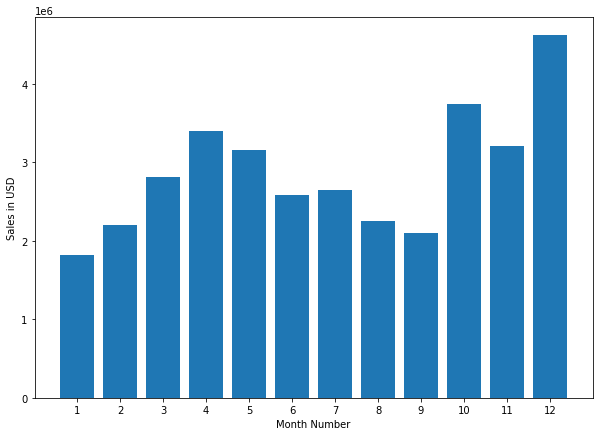

In [ ]:
import matplotlib.pyplot as plt

months = range(1, 13)

plt.figure(figsize=(10, 7))

plt.bar(months, sales["Sales"])

plt.xticks(months)

plt.xlabel("Month Number")
plt.ylabel("Sales in USD")

plt.show()

### Adding a City column

In [ ]:
# Let's use .apply() method

data["City"] = data["Purchase Address"].apply(lambda x: x.split(',')[1])
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


# ❓ Question 2: What city has the highest number of Sales ?




In [ ]:
Cities = data.groupby("City").sum()
print("The city that has the highest number of Sales is San Francisco with Sales of ${}".format(Cities["Sales"].max()))

The city that has the highest number of Sales is San Francisco with Sales of $8262203.91


✅ **Answer:** San Francisco 

❗ We have a problem in this approach, which is the duplicates in cities.
To solve this problem, we will include the state in our aggregation

In [ ]:
def get_state(address):
  return address.split(',')[2][0:3]

In [ ]:
data["City"] = data["Purchase Address"].apply(lambda x: x.split(',')[1] + " " + get_state(x))

In [ ]:
Cities = data.groupby("City").sum()
print("The city that has the highest number of Sales is San Francisco with Sales of ${}".format(Cities["Sales"].max()))
result = Cities["Sales"]
result

The city that has the highest number of Sales is San Francisco with Sales of $8262203.91


City
 Atlanta  GA          2795498.58
 Austin  TX           1819581.75
 Boston  MA           3661642.01
 Dallas  TX           2767975.40
 Los Angeles  CA      5452570.80
 New York City  NY    4664317.43
 Portland  ME          449758.27
 Portland  OR         1870732.34
 San Francisco  CA    8262203.91
 Seattle  WA          2747755.48
Name: Sales, dtype: float64

✅ **Answer:** San Francisco 

## Let's Plot the results

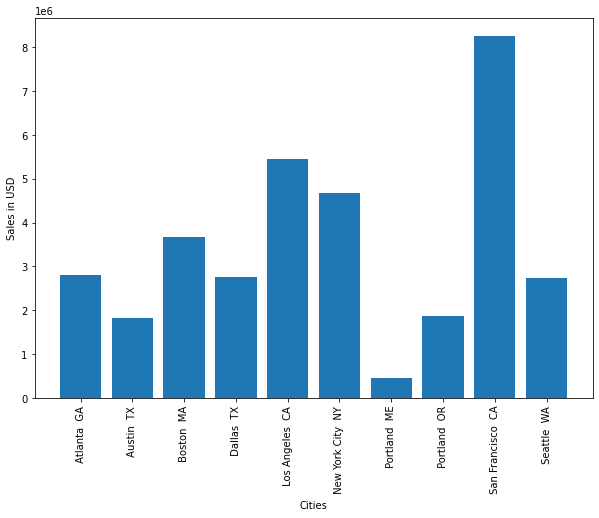

In [ ]:
import matplotlib.pyplot as plt

cities = [city for city, df in data.groupby("City")]

plt.figure(figsize=(10, 7))

plt.bar(cities, result)

plt.xticks(cities, rotation="vertical", fontsize=10)

plt.xlabel("Cities")
plt.ylabel("Sales in USD")

plt.show()

In [ ]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin TX
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin TX
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin TX
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco CA
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco CA
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


In [ ]:
data["Order Date"] = pd.to_datetime(data["Order Date"])

In [ ]:
data["Hour"] = data["Order Date"].dt.hour
data["Minute"] = data["Order Date"].dt.minute
data["Count"] = 1
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin TX,20,59,1
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin TX,20,59,1
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin TX,20,59,1
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco CA,5,39,1
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco CA,0,1,1


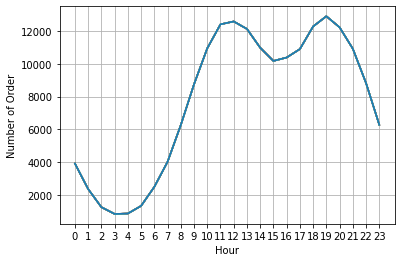

In [ ]:
# Let's group by to find the best time to display ads

hours = [hour for hour, df in data.groupby("Hour")]

# Using a line chart

plt.plot(hours, data.groupby("Hour").count())

plt.xlabel("Hour")
plt.ylabel("Number of Order")
plt.xticks(hours)
plt.grid()

plt.show()


# ❓ Question 3:  What time should we display advertisements to maximize the likelihood of purchases




✅ **Answer:** Recommendation is to display ads around 11:00 and 19:00

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin TX,20,59,1
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin TX,20,59,1
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin TX,20,59,1
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco CA,5,39,1
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco CA,0,1,1


In [ ]:
# Search for rows that have duplicate Order ID values

df = data[data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

# Now, drop off the duplicated rows 
df = df[['Order ID','Grouped' ]].drop_duplicates()
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Grouped
0,162009,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,"iPhone,Lightning Charging Cable"
60,162066,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,"Vareebadd Phone,USB-C Charging Cable"
78,162082,"Vareebadd Phone,Wired Headphones"


In [ ]:
# Now we need to count these pairs
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# ❓ Question 4: What products are most sold together?


✅ **Answer:** **iPhone** and **Lightning Charging Cable** for **1005** Orders






# ❓ Question 4: What product sold the most? why do you think it sold the most?

Text(0, 0.5, 'Quantity Ordered')

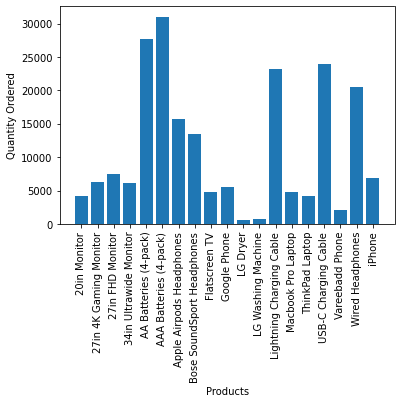

In [ ]:
product_group = data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xticks(rotation='vertical')

plt.xlabel('Products')
plt.ylabel('Quantity Ordered')

✅ **Answer:** AAA Batteries (4-pack), may be because they are cheap

### Overlay this graph with the products prices

Text(0, 0.5, 'Price')

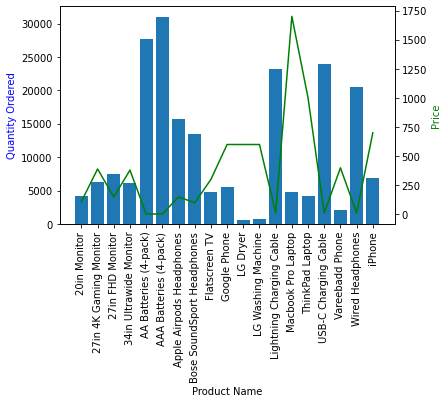

In [ ]:
prices = data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax1.set_xticklabels(prices, rotation='vertical')
ax2.plot(products, prices,'g-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel("Quantity Ordered", color='b')
ax2.set_ylabel('Price', color='g')